In [201]:
import pickle
import torch
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [202]:
def sequence_deviation(output_sequences):
    """
    output_sequences should be a 2D Tensor
    return: standard deviation of each sequence
    """
    if not isinstance(output_sequences, torch.Tensor):
        output_sequences = [torch.tensor(i, dtype=torch.int64) for i in output_sequences]
        output_sequences = torch.stack(output_sequences)
    length = output_sequences.size(1)
    SD = 2*torch.sum(torch.abs(output_sequences[:,1:] - output_sequences[:,:-1]) - 1, 1)/(length * (length-1))
    return SD


### PLANNED

In [203]:
with open('planned/propose_sequence_100.pkl', 'rb') as f:
    data = pickle.load(f)
SD_planned = sequence_deviation(data[20000:])

torch.max(SD_planned), torch.min(SD_planned), torch.mean(SD_planned), torch.std(SD_planned)

(tensor(0.4251), tensor(0.0065), tensor(0.0519), tensor(0.0371))

### GUROBI

In [204]:
with open('gurobi/test_solution.pkl', 'rb') as f:
    data = pickle.load(f)
SD_gurobi = sequence_deviation(data)

torch.max(SD_gurobi), torch.min(SD_gurobi), torch.mean(SD_gurobi), torch.std(SD_gurobi)

(tensor(0.2731), tensor(0.0234), tensor(0.1176), tensor(0.0425))

### NEAREST NEIGHBOR

In [205]:
with open('nn/test_location-nn.pkl', 'rb') as f:
    data = pickle.load(f)
    data = [i[1] for i in data[0]]
SD_nn = sequence_deviation(data)

torch.max(SD_nn), torch.min(SD_nn), torch.mean(SD_nn), torch.std(SD_nn)

(tensor(0.2663), tensor(0.0438), tensor(0.1318), tensor(0.0443))

In [206]:
results = []
labels  = []
results.append(SD_planned)
labels.append('planned routes')
results.append(SD_gurobi)
labels.append('Gurobi')
results.append(SD_nn)
labels.append('Nearest Neighbor')

### COST INPUT: lr 0.01 decay 1 100epochs

In [207]:
with open('tsp100_rollout_0.01_1.0_100epochs_cost/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
cost_001_1_100 = sequence_deviation(data)
results.append(cost_001_1_100)
labels.append('Cost: 0.01-1-100')
torch.max(cost_001_1_100), torch.min(cost_001_1_100), torch.mean(cost_001_1_100), torch.std(cost_001_1_100)

(tensor(0.), tensor(0.), tensor(0.), tensor(0.))

### COST INPUT: lr 0.01 decay 0.96 100epochs

In [208]:
with open('tsp100_rollout_0.01_0.96_100epochs_cost/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
cost_001_096_100 = sequence_deviation(data)
results.append(cost_001_096_100)
labels.append('Cost: 0.01-0.96-100')
# tour [109, 173, 203, 221, 235, 263, 348, 352, 355, 384, 414, 418, 426, 427, 440]
torch.max(cost_001_096_100), torch.min(cost_001_096_100), torch.mean(cost_001_096_100), torch.std(cost_001_096_100)

(tensor(0.4303), tensor(0.), tensor(0.0079), tensor(0.0508))

### COST INPUT: lr 0.001 decay 1 100epochs

In [209]:
with open('tsp100_rollout_0.001_1.0_100epochs_cost/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
cost_0001_1_100 = sequence_deviation(data)
results.append(cost_0001_1_100)
labels.append('Cost: 0.001-1-100')
# tour [  1,   4,   8,   9,  16,  20,  22,  27,  37,  46,  63,  70,  99,
#        113, 124, 146, 148, 158, 163, 188, 189, 204, 265, 269, 272, 279,
#        286, 293, 308, 318, 324, 341, 344, 381, 394, 396, 408, 419, 435,
#        436, 453, 457, 459, 467, 473]
torch.max(cost_0001_1_100), torch.min(cost_0001_1_100), torch.mean(cost_0001_1_100), torch.std(cost_0001_1_100)

(tensor(0.6420), tensor(0.), tensor(0.0744), tensor(0.1552))

### COST INPUT: lr 0.001 decay 0.96 100epochs

In [210]:
with open('tsp100_rollout_0.001_0.96_100epochs_cost/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
cost_0001_096_100 = sequence_deviation(data)
results.append(cost_0001_096_100)
labels.append('Cost: 0.001-0.96-100')
# tour [  1,   3,   8,  25,  27,  46,  62,  66,  69,  74, 110, 113, 143,
#        146, 176, 180, 200, 204, 219, 229, 243, 252, 261, 265, 286, 289,
#        312, 341, 345, 354, 357, 366, 373, 386, 387, 405, 408, 417, 420,
#        458]
torch.max(cost_0001_096_100), torch.min(cost_0001_096_100), torch.mean(cost_0001_096_100), torch.std(cost_0001_096_100)

(tensor(0.5802), tensor(0.), tensor(0.1884), tensor(0.1569))

### COST INPUT: lr 0.0001 decay 1 100epochs

In [211]:
with open('tsp100_rollout_0.0001_1.0_100epochs_cost/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
cost_00001_1_100 = sequence_deviation(data)
results.append(cost_00001_1_100)
labels.append('Cost: 0.0001-1-100')
# tour [ 21,  23,  30,  43,  74, 110, 180, 237, 365, 382, 387, 399]
torch.max(cost_00001_1_100), torch.min(cost_00001_1_100), torch.mean(cost_00001_1_100), torch.std(cost_00001_1_100)

(tensor(0.7230), tensor(0.0087), tensor(0.3246), tensor(0.1322))

### COST INPUT: lr 0.0001 decay 0.96 100epochs

In [212]:
with open('tsp100_rollout_0.0001_0.96_100epochs_cost/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
cost_00001_096_100 = sequence_deviation(data)
results.append(cost_00001_096_100)
labels.append('Cost: 0.0001-1-100')
# tour [ 27,  30,  40, 365, 387, 457]
torch.max(cost_00001_096_100), torch.min(cost_00001_096_100), torch.mean(cost_00001_096_100), torch.std(cost_00001_096_100)

(tensor(0.6725), tensor(0.0560), tensor(0.3110), tensor(0.1163))

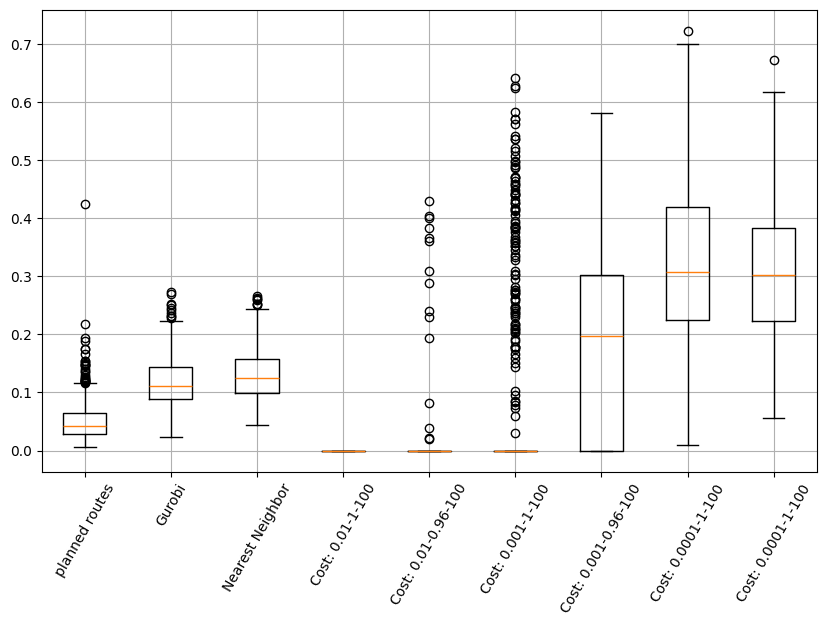

In [213]:
fig, ax = plt.subplots(figsize = (10, 6))

# Creating box plots
ax.boxplot(results, labels=labels)
ax.set_xticklabels(labels, rotation=60)
ax.grid(True)
plt.show()

# SD

In [214]:
SD_results = []
SD_labels  = []

SD_results.append(SD_planned)
SD_labels.append('planned routes')
SD_results.append(SD_gurobi)
SD_labels.append('Gurobi')
SD_results.append(SD_nn)
SD_labels.append('Nearest Neighbor')

### lr 0.01 decay 1 100 epochs

In [215]:
with open('tsp100_rollout_0.01_1.0_100epochs_SD/_test_pi-epoch-50.pkl', 'rb') as f:
    data = pickle.load(f)
SD_001_1_100 = sequence_deviation(data)
SD_results.append(SD_001_1_100)
SD_labels.append('SD: 0.01-1-100-3layers')
# tour 23
torch.max(SD_001_1_100), torch.min(SD_001_1_100), torch.mean(SD_001_1_100), torch.std(SD_001_1_100)

(tensor(0.3818), tensor(0.), tensor(0.0008), tensor(0.0175))

### lr 0.01 decay 0.96 100 epochs

In [216]:
with open('tsp100_rollout_0.01_0.96_100epochs_SD/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_001_096_100 = sequence_deviation(data)
SD_results.append(SD_001_096_100)
SD_labels.append('SD: 0.01-0.96-100-3layers')
# tour [  0, 103, 107, 109, 125, 152, 154, 218, 238, 297, 325]
torch.max(SD_001_096_100), torch.min(SD_001_096_100), torch.mean(SD_001_096_100), torch.std(SD_001_096_100)

(tensor(0.6897), tensor(0.), tensor(0.0037), tensor(0.0385))

### lr 0.001 decay 1 100 epochs

In [217]:
with open('tsp100_rollout_0.001_1.0_100epochs_SD/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_0001_1_100 = sequence_deviation(data)
SD_results.append(SD_0001_1_100)
SD_labels.append('SD: 0.001-1-100-3layers')
#tour [ 23,  49,  95, 112, 138, 155, 165, 166, 205, 256, 269, 273, 375,
#        391, 434, 451]
torch.max(SD_0001_1_100), torch.min(SD_0001_1_100), torch.mean(SD_0001_1_100), torch.std(SD_0001_1_100)

(tensor(0.5465), tensor(0.), tensor(0.0107), tensor(0.0631))

### lr 0.001 decay 0.96 100 epochs

In [218]:
with open('tsp100_rollout_0.001_0.96_100epochs_SD/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_0001_096_100 = sequence_deviation(data)
SD_results.append(SD_0001_096_100)
SD_labels.append('SD: 0.001-0.96-100-3layers')
# tour 219 , 12,  24,  37,  39,  44,  45,  49,  63,  77,  81,  86,  94,  95,
#        106, 111, 112, 117, 119, 138, 147, 153, 155, 165, 166, 168, 171,
#        175, 177, 183, 190, 193, 205, 207, 219, 221, 224, 250, 255, 256,
#        258, 262, 273, 283, 302, 309, 310, 313, 318, 332, 335, 343, 349,
#        374, 375, 382, 391, 412, 432, 434, 435, 445, 449, 459, 465, 466]
torch.max(SD_0001_096_100), torch.min(SD_0001_096_100), torch.mean(SD_0001_096_100), torch.std(SD_0001_096_100)

(tensor(0.5335), tensor(0.), tensor(0.0349), tensor(0.0989))

In [253]:
a = [i for i in range(475) if cost_0001_1_100[i] > 0 and cost_0001_1_100[i] < 0.2]
a

[1,
 20,
 27,
 70,
 124,
 148,
 188,
 189,
 204,
 279,
 341,
 396,
 436,
 453,
 457,
 459,
 467,
 473]

In [265]:
a = [i for i in range(475) if cost_0001_1_100[i] <0.1 and cost_0001_1_100[i] > 0]
np.array(a)

array([  1,  70, 124, 188, 279, 453, 467])

In [266]:
cost_0001_1_100[a]

tensor([0.0586, 0.0842, 0.0952, 0.0792, 0.0729, 0.0848, 0.0307])

In [267]:
SD_0001_096_100[a]

tensor([0., 0., 0., 0., 0., 0., 0.])

In [269]:
SD_planned[a]

tensor([0.0291, 0.0903, 0.0453, 0.0412, 0.0507, 0.0434, 0.1293])

In [270]:
SD_gurobi[a]

tensor([0.0693, 0.1198, 0.1198, 0.1695, 0.0384, 0.0624, 0.1501])

In [271]:
SD_nn[a]

tensor([0.0855, 0.0972, 0.1255, 0.1224, 0.0707, 0.0681, 0.1626])

### lr 0.0001 decay 1 100 epochs

In [219]:
with open('tsp100_rollout_0.0001_1.0_100epochs_SD/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_00001_1_100 = sequence_deviation(data)
SD_results.append(SD_00001_1_100)
SD_labels.append('SD: 0.0001-1-100-3layers')
# tour [  2,   8,  23,  27,  34,  69,  94, 110, 162, 180, 192, 204, 209,
#        212, 219, 229, 240, 241, 251, 252, 261, 286, 326, 331, 339, 341,
#        365, 372, 373, 386, 387, 399, 402, 408, 417]
torch.max(SD_00001_1_100), torch.min(SD_00001_1_100), torch.mean(SD_00001_1_100), torch.std(SD_00001_1_100)

(tensor(0.9693), tensor(0.), tensor(0.2856), tensor(0.1665))

In [220]:
sd = np.array([i for i in range(475) if SD_00001_1_100[i] > 0 and SD_00001_1_100[i] < 0.15])
SD_00001_1_100[sd], sd

(tensor([0.0901, 0.1180, 0.0925, 0.1366, 0.1485, 0.1479, 0.1333, 0.0677, 0.1333,
         0.0966, 0.1287, 0.1295, 0.1172, 0.1446, 0.1097, 0.1349, 0.1416, 0.1123,
         0.0570, 0.1349, 0.1327, 0.0796, 0.1347, 0.1232, 0.1448, 0.1455, 0.0776,
         0.0012, 0.1224, 0.1143, 0.1087, 0.1042, 0.1269, 0.1273, 0.1313]),
 array([  2,   8,  23,  27,  34,  69,  94, 110, 162, 180, 192, 204, 209,
        212, 219, 229, 240, 241, 251, 252, 261, 286, 326, 331, 339, 341,
        365, 372, 373, 386, 387, 399, 402, 408, 417]))

### lr 0.0001 decay 0.96 100 epochs

In [221]:
with open('tsp100_rollout_0.0001_0.96_100epochs_SD/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_00001_096_100 = sequence_deviation(data)
SD_results.append(SD_00001_096_100)
SD_labels.append('SD: 0.0001-0.96-100-3layers')
# tour [ 30,  40, 110, 161, 209, 252, 355, 365, 387, 408, 457]
torch.max(SD_00001_096_100), torch.min(SD_00001_096_100), torch.mean(SD_00001_096_100), torch.std(SD_00001_096_100)

(tensor(0.6048), tensor(0.0644), tensor(0.2741), tensor(0.1116))

### lr 0.0001 decay 0.96 200 epochs

In [222]:
with open('tsp100_rollout_0.0001_0.96_200epochs_SD/_test_pi-epoch-199.pkl', 'rb') as f:
    data = pickle.load(f)
SD_00001_096_200 = sequence_deviation(data)
SD_results.append(SD_00001_096_200)
SD_labels.append('SD: 0.0001-0.96-200-3layers')
# tour [ 23,  30, 180, 219, 261, 365, 387, 399]
torch.max(SD_00001_096_200), torch.min(SD_00001_096_200), torch.mean(SD_00001_096_200), torch.std(SD_00001_096_200)

(tensor(0.6586), tensor(0.0572), tensor(0.3124), tensor(0.1244))

### lr 0.001 decay 0.96 100 epochs 2 layers

In [223]:
with open('tsp100_rollout_0.001_0.96_100epochs_SD_2layers/_val_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_0001_096_100_2layers = sequence_deviation(data)
SD_results.append(SD_0001_096_100_2layers)
SD_labels.append('SD: 0.001-0.96-100-2layers')
# tour [384, 440]
torch.max(SD_0001_096_100_2layers), torch.min(SD_0001_096_100_2layers), torch.mean(SD_0001_096_100_2layers), torch.std(SD_0001_096_100_2layers)

(tensor(0.6384), tensor(0.), tensor(0.0097), tensor(0.0577))

### lr 0.0001 decay 1 100 epochs 2 layers

In [224]:
with open('tsp100_rollout_0.0001_1.0_100epochs_SD_2layers/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_00001_1_100_2layers = sequence_deviation(data)
SD_results.append(SD_00001_1_100_2layers)
SD_labels.append('SD: 0.0001-1.0-100-2layers')
# tour [ 23,  30,  36, 237, 408]
torch.max(SD_00001_1_100_2layers), torch.min(SD_00001_1_100_2layers), torch.mean(SD_00001_1_100_2layers), torch.std(SD_00001_1_100_2layers)

(tensor(0.6784), tensor(0.0628), tensor(0.3302), tensor(0.1274))

### lr 0.0001 decay 0.96 100 epochs 2 layers

In [225]:
with open('tsp100_rollout_0.0001_0.96_100epochs_SD_2layers/_test_pi-epoch-99.pkl', 'rb') as f:
    data = pickle.load(f)
SD_00001_096_100_2layers = sequence_deviation(data)
SD_results.append(SD_00001_096_100_2layers)
SD_labels.append('SD: 0.0001-0.96-100-2layers')
# tour [ 23,  27,  30,  77, 180, 286, 387, 399, 417, 457]
torch.max(SD_00001_096_100_2layers), torch.min(SD_00001_096_100_2layers), torch.mean(SD_00001_096_100_2layers), torch.std(SD_00001_096_100_2layers)

(tensor(0.7234), tensor(0.), tensor(0.3191), tensor(0.1309))

In [226]:
SD_labels

['planned routes',
 'Gurobi',
 'Nearest Neighbor',
 'SD: 0.01-1-100-3layers',
 'SD: 0.01-0.96-100-3layers',
 'SD: 0.001-1-100-3layers',
 'SD: 0.001-0.96-100-3layers',
 'SD: 0.0001-1-100-3layers',
 'SD: 0.0001-0.96-100-3layers',
 'SD: 0.0001-0.96-200-3layers',
 'SD: 0.001-0.96-100-2layers',
 'SD: 0.0001-1.0-100-2layers',
 'SD: 0.0001-0.96-100-2layers']

## PLOT

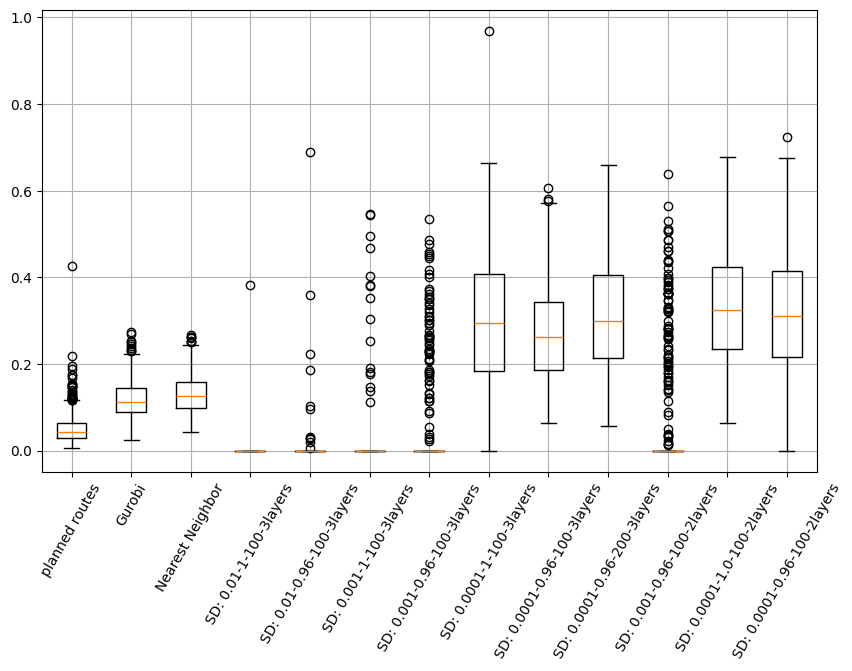

In [227]:
fig, ax = plt.subplots(figsize = (10, 6))

# Creating box plots
ax.boxplot(SD_results, labels=SD_labels)
ax.set_xticklabels(SD_labels, rotation=60)
ax.grid(True)
plt.show()